## Main function test

In [69]:
# #-*- coding=utf-8 -*-
# import requests
# import json
# import time
# import hashlib
# import pandas as pd
# from datetime import datetime

# URL = "https://s5.securepilot.com/parking/v1/query_record"
# api_key = "PARK-eMPpua7y17"
# api_secret = "2PHIAGI5qv5IhMGZ56iy"

# mac_gemtek = "101a"
# mac_address1 = mac_gemtek + "0d0100ab"
# mac_address_test = mac_gemtek + "0d01019a"

# def byteToMagData(Low_byte, High_byte):
#     return twos_comp(byte2SwapToNumber(Low_byte,High_byte), 16)

# def byte2SwapToNumber(Low_byte, High_byte):
#     return int(Low_byte.encode(), 16) + int(High_byte.encode(), 16) * 256

# def twos_comp(val, bits):
#     """compute the 2's complement of int value val"""
#     if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
#         val = val - (1 << bits)        # compute negative value
#     return val 

# def getParkDataResponse(URL, api_key, api_secret, macID):
#     current_unix_time = str(int(time.time()))
#     api_token = hashlib.sha1((api_secret + current_unix_time).encode('utf-8')).hexdigest()
#     index = 0
#     limit = 2
#     print("------------- RESTful API parameter --------------")
#     print("mac: ", macID)
#     print("api_key: ", api_key)
#     print("api_secret: ", api_secret)
#     print("unix_time: ", current_unix_time)
#     print("api_token: ", api_token)
#     print("index: ", index, "limit: ", limit)
#     print("--------------------------------------------------\n")

#     if len(macID) != 12:
#         print("mac address is ilegal !!")

# #     payload = { "index" : 1, "limit" : 20, "mac" : macID, 
# #            "api_key" : api_key, "api_token" : api_token, "time" : current_unix_time
# #            }
# #     payload = {
# #         'mac' : macID, 
# #         'api_key' : api_key, 
# #         'api_token' : api_token, 
# #         'time' : current_unix_time 
# #     }
    
#     payload = {
#         "index": index,
#         "limit" : limit,
#         "mac" : "101a0d01019a",
#         "api_key" : "PARK-eMPpua7y17",
#         "api_token" : "7a5db58d81e51ce9cb5a7731d6c6b7fa1bb0144a",
#         "time" : "1500874971"
#     }
#     print("------------- Payload Check ----------------------")
#     print("Payload:", payload)
#     print("--------------------------------------------------\n")

# #     return requests.post(URL, data = payload)
#     return requests.post(URL, json = payload)

# def getPraseTargetData(req):
#     prase_data = prase_data['value']['hits']
    
#     prase_data_from_json = []
#     # columes in data frame
#     prase_data_columes = ['_id', '_index', 'create_at_time','recv_at_time','data',
#                           'company','road','slot_num','gwip', 
#                           "magX", "magY", "magZ", "magT"]
#     # get data by list
#     for each in prase_data:
#         fullData = []
#         pakcetHeader = "fcffff07"
#         packetByte = []
        
#         fullData = [ each['_id'], each['_index'], 
#              each['_source']['create_at'], each['_source']['recv'],
#              each['_source']['data'],
#              each['_source']['extra']['company'],  each['_source']['extra']['road'], 
#              each['_source']['extra']['slot_num'], each['_source']['gwip']
#         ]
        
#         # get high/ low byte
#         packetMagData = each['_source']['data']
        
#         if packetMagData.find(pakcetHeader) != -1:
#             index = [i for i in range(len(packetMagData)) if i % 2 == 0]   
#             for each in index:
#                 packetByte.append(packetMagData[each:each+2])
# #             print("packet Byte: ", packetByte)
#         else:
#             print("packet header error")

#         magX = byteToMagData(packetByte[4], packetByte[5])
#         magY = byteToMagData(packetByte[6], packetByte[7])
#         magZ = byteToMagData(packetByte[8], packetByte[9])
#         magT = byteToMagData(packetByte[10], '00')
        
#         fullData.extend([magX, magY, magZ, magT])
#         print("Data:", fullData)
#         prase_data_from_json.append(fullData)
       
#     return pd.DataFrame(prase_data_from_json, columns=prase_data_columes) 


# # main funciton
# req = getParkDataResponse(URL, api_key, api_secret, mac_address_test)
# server_ReturnCode = req.json()['status']['code']
# server_ReturnMsg = req.json()['status']['message']

# if(req.ok and server_ReturnCode == 1200):
#     print("------------- Request Status ---------------------")
#     print("Request URL: ",req.url, ", Status: OK ")
#     print("--------------------------------------------------\n")
    
#     df = getPraseTargetData(req)
#     NodeName = df['slot_num'][0]
#     timeName = datetime.now().strftime('%Y%m%d_%H%M%S')
#     csvFileName = timeName + '_' + NodeName + '.csv'
#     df.to_csv(csvFileName, encoding='utf_8_sig')
# else:
#      print("Status: FAIL , Server return code ",server_ReturnCode, ", Msg :", server_ReturnMsg)
    
# # #     print(req.text)



------------- RESTful API parameter --------------
mac:  101a0d01019a
api_key:  PARK-eMPpua7y17
api_secret:  2PHIAGI5qv5IhMGZ56iy
unix_time:  1501139831
api_token:  118dba38cfed8b07d99c576cb04b9ebefb70537c
index:  0 limit:  2
--------------------------------------------------

------------- Payload Check ----------------------
Payload: {'index': 0, 'limit': 2, 'mac': '101a0d01019a', 'api_key': 'PARK-eMPpua7y17', 'api_token': '7a5db58d81e51ce9cb5a7731d6c6b7fa1bb0144a', 'time': '1500874971'}
--------------------------------------------------

------------- Request Status ---------------------
Request URL:  https://s5.securepilot.com/parking/v1/query_record , Status: OK 
--------------------------------------------------

Data: ['AV197R2L-R03vmj0K7en', 'parking_record_index_v2', '2017-07-26T08:04:37.898Z', '2017-07-26T08:04:37.000Z', 'fcffff072d001100f4001c', 'yilan', '宜蘭市中山路二段', '111', '10.5.151.1', 45, 17, 244, 28]
Data: ['AV197Q3r-R03vmj0K7ei', 'parking_record_index_v2', '2017-07-26T08

## API Class

In [22]:
#-*- coding=utf-8 -*-
from datetime import datetime
import hashlib

class Gemtek_restful_api:
    def __init__(self, URL, api_key, api_secret, macID, index = 0, limit = 10, start_time = 0):
        self.URL = URL
        self.api_key = api_key
        self.api_secret = api_secret
        self.macID = macID
        self.index = index
        self.limit = limit
        self.start_time = start_time
        self.time = str(int(time.time()))
        self.api_token = hashlib.sha1((self.api_secret + self.time).encode('utf-8')).hexdigest()
        self.payload = {
            "index": self.index,
            "start_time" : self.start_time,
            "limit" : self.limit,
            "mac" : self.macID,
            "api_key" : self.api_key,
            "api_token" : self.api_token,
            "time" : self.time
        }
        self.jsonData = None
        self.request_OK = None
        self.jsonDataLength = None
        
        if len(macID) != 12:
            print("mac address is ilegal !!")
        
    def set_query_index(self, index ):
        self.index = index

    def set_query_limit(self, limit ):
        self.limit = limit
        
    def set_query_start_time(self, start_time = 0):
        self.start_time = start_time   
        
        
    def print_API_parameter(self):
        print("------------- RESTful API parameter --------------")
        print("mac: ", self.macID)
        print("api_key: ", self.api_key)
        print("api_secret: ", self.api_secret)
        print("unix_time: ", self.time)
        print("api_token: ", self.api_token)
        print("index: ", self.index, "limit: ", self.limit)
        print("Payload:", self.payload)
        print("--------------------------------------------------\n")
        
    def get_query_data(self):    
        req = requests.post(self.URL, json = self.payload)
        self.jsonData = req.json()
        self.jsonDataLength = self.jsonData['value']['total']
        server_ReturnCode = self.jsonData['status']['code']
        server_ReturnMsg = self.jsonData['status']['message']
        
        if (server_ReturnCode == 1200):
            self.request_OK = True
        else:
            self.request_OK = False
        
        print("------------- Request Status ---------------------")
        print("Request URL: ", req.url)
        print("Server return code: ",server_ReturnCode, ", Msg :", server_ReturnMsg)
        print("Packet Length: ", self.jsonDataLength)
        print("--------------------------------------------------\n")
     
        return self.jsonData
    
    def update_new_api_token(self):    
        self.time = str(int(time.time()))
        self.api_token = hashlib.sha1((self.api_secret + self.time).encode('utf-8')).hexdigest()
        self.payload["time"] = self.time
        self.payload["api_token"] = self.api_token
    


In [23]:
# lenth = 100
# test_api = Gemtek_restful_api(URL, api_key, api_secret, mac_address1, limit = lenth)
# test_api.print_API_parameter()
# query_JsonData = test_api.get_query_data()

In [24]:
def byteToMagData(Low_byte, High_byte):
    value = int(Low_byte.encode(), 16) + int(High_byte.encode(), 16) * 256
    return twos_comp(value, 16)

def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val 

def getPraseTargetData(Data):
    prase_data = Data['value']['hits']
    prase_data_from_json = []
    
    # columes in data frame
    prase_data_columes = ['_id', '_index', 'mac','create_at_time','recv_at_time','frameCnt', 'data',
                          'company','road','slot_num','gwip', 
                          "magX", "magY", "magZ", "magT"]
    # get data by list
    for each in prase_data:
        fullData = []
        pakcetHeader = "fcffff07"
        packetByte = []
        
        fullData = [ each['_id'], each['_index'], each['_source']['macAddr'],
             each['_source']['create_at'], each['_source']['recv'], each['_source']['frameCnt'],
             each['_source']['data'], 
             each['_source']['extra']['company'],  each['_source']['extra']['road'], 
             each['_source']['extra']['slot_num'], each['_source']['gwip']
        ]
        
        # get high/ low byte
        packetMagData = each['_source']['data']
        
        if packetMagData.find(pakcetHeader) != -1:
            index = [i for i in range(len(packetMagData)) if i % 2 == 0]   
            for each in index:
                packetByte.append(packetMagData[each:each+2])
#             print("packet Byte: ", packetByte)
        else:
            print("packet header error")

        magX = byteToMagData(packetByte[4], packetByte[5])
        magY = byteToMagData(packetByte[6], packetByte[7])
        magZ = byteToMagData(packetByte[8], packetByte[9])
        magT = byteToMagData(packetByte[10], '00')
        
        fullData.extend([magX, magY, magZ, magT])
        print("Data:", fullData)
        prase_data_from_json.append(fullData)
       
    return pd.DataFrame(prase_data_from_json, columns=prase_data_columes) 


In [30]:
import time
from datetime import datetime

current_time_obj = time.time()
current_datetime_obj = datetime.fromtimestamp(current_time_obj)
current_time = int(current_time_obj)
print(current_time)

1501639844


In [31]:
#-*- coding=utf-8 -*-
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime

URL = "https://s5.securepilot.com/parking/v1/query_record"
api_key = "PARK-eMPpua7y17"
api_secret = "2PHIAGI5qv5IhMGZ56iy"

mac_gemtek = "101a"
mac_address1 = mac_gemtek + "0d0100ab"
mac_address_test = mac_gemtek + "0d01019a"

mac_query = mac_address_test
# main funciton
parking_api = Gemtek_restful_api(URL, api_key, api_secret, mac_query, index = 0 , limit = 20, start_time = current_time)
parking_api.print_API_parameter()
query_JsonData = parking_api.get_query_data()

testName = ''

if(parking_api.request_OK):
    df = getPraseTargetData(query_JsonData)
    NodeName = mac_query
    timeName = current_datetime_obj.strftime('%Y%m%d_%H%M%S')
    csvFileName = testName + 'ID_' + NodeName + '_' + timeName + '.csv'
    df.to_csv(csvFileName, encoding='utf_8_sig')
else:
    print("Server Request Fail")
    


------------- RESTful API parameter --------------
mac:  101a0d01019a
api_key:  PARK-eMPpua7y17
api_secret:  2PHIAGI5qv5IhMGZ56iy
unix_time:  1501639847
api_token:  fd1f7ab93b72fbd2e0ef4bae86a89045e87871b0
index:  0 limit:  20
Payload: {'index': 0, 'start_time': 1501639844, 'limit': 20, 'mac': '101a0d01019a', 'api_key': 'PARK-eMPpua7y17', 'api_token': 'fd1f7ab93b72fbd2e0ef4bae86a89045e87871b0', 'time': '1501639847'}
--------------------------------------------------

------------- Request Status ---------------------
Request URL:  https://s5.securepilot.com/parking/v1/query_record
Server return code:  1200 , Msg : Command succeeded
Packet Length:  3209
--------------------------------------------------

Data: ['AV2gf7ck-R03vmj0MIU3', 'parking_record_index_v2', '101a0d01019a', '2017-08-02T01:11:50.819Z', '2017-08-02T01:11:50.000Z', 47, 'fcffff07bfff180070ff1c', 'yilan', '宜蘭市中山路二段', '111', '10.5.151.1', -65, 24, -144, 28]
Data: ['AV2gf6tu-R03vmj0MIU1', 'parking_record_index_v2', '101a0d0

In [144]:
query_JsonData

{'status': {'code': 1200, 'message': 'Command succeeded'},
 'value': {'hits': [{'_id': 'AV2DJ2yc-R03vmj0LJ1i',
    '_index': 'parking_record_index_v2',
    '_score': None,
    '_source': {'channel': 922625000,
     'commsysType': 'lora',
     'create_at': '2017-07-27T08:26:25.307Z',
     'data': 'fc000105600bb60122',
     'dataParse': {'keepAlive': False,
      'lowBattery': False,
      'mdi': 1,
      'status': False,
      'temperature': 34,
      'voltage': 2.998},
     'doc_type': 'parking_record',
     'extra': {'company': 'yilan',
      'road': '宜蘭市中山路二段',
      'slot_num': '正文009',
      'type': 'node'},
     'fport': 2,
     'frameCnt': 339,
     'gwid': '00001c497b0b7cfd',
     'gwip': '192.168.0.225',
     'macAddr': '101a0d0100ab',
     'recv': '2017-07-27T08:25:14.000Z',
     'repeater': '00000000ffffffff',
     'rssi': -89,
     'sf': 10,
     'snr': 19.5,
     'snr_max': 24.5,
     'snr_min': 14.5,
     'systype': 13},
    '_type': 'parking_record_type'},
   {'_id': 'AV2

## Data prasing 
 1. lattency

In [32]:
#-*- coding=utf-8 -*-
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime
import matplotlib as plt

df = pd.read_csv(csvFileName, encoding='utf_8_sig')
df.head(5)

Unnamed: 0                   _id                   _index           mac  \
0           0  AV2gf7ck-R03vmj0MIU3  parking_record_index_v2  101a0d01019a   
1           1  AV2gf6tu-R03vmj0MIU1  parking_record_index_v2  101a0d01019a   
2           2  AV2gf6AW-R03vmj0MIU0  parking_record_index_v2  101a0d01019a   
3           3  AV2gf5_0-R03vmj0MIUz  parking_record_index_v2  101a0d01019a   
4           4  AV2gf5_a-R03vmj0MIUy  parking_record_index_v2  101a0d01019a   

             create_at_time              recv_at_time  frameCnt  \
0  2017-08-02T01:11:50.819Z  2017-08-02T01:11:50.000Z        47   
1  2017-08-02T01:11:47.821Z  2017-08-02T01:11:47.000Z        46   
2  2017-08-02T01:11:44.917Z  2017-08-02T01:11:44.000Z        45   
3  2017-08-02T01:11:44.883Z  2017-08-02T01:11:44.000Z        45   
4  2017-08-02T01:11:44.857Z  2017-08-02T01:11:44.000Z        45   

                     data company      road  slot_num            gwip  magX  \
0  fcffff07bfff180070ff1c   yilan  宜蘭市中山路二段       111      10.5.151.1   -65   
1  fcffff07c0ff180070ff1c   yilan  宜蘭市中山路二段       111      10.5.151.1   -64   
2  fcffff07c0ff180070ff1c   yilan  宜蘭市中山路二段       111  192.168.88.122   -64   
3  fcffff07c0ff180070ff1c   yilan  宜蘭市中山路二段       111  192.168.88.150   -64   
4  fcffff07c0ff180070ff1c   yilan  宜蘭市中山路二段       111  192.168.88.113   -64   

   magY  magZ  magT  
0    24  -144    28  
1    24  -144    28  
2    24  -144    28  
3    24  -144    28  
4    24  -144    28

In [33]:
def get_datetime_from_timeString(date_string):
    date_string = date_string.replace('T',' ').replace('Z','')
    datetime_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object

def get_two_datetime_delta(datetime_object1 , datetime_object2):
    datetime_delta   = datetime_object2 - datetime_object1
    return datetime_delta.total_seconds()

# date_string1 = "2017-07-26 09:04:33.897"
# date_string2 = "2017-07-26 09:08:33.897"

# datetime_object1= get_datetime_from_timeString(date_string1)
# datetime_object2 = get_datetime_from_timeString(date_string2)
# latency_time = get_two_datetime_delta(datetime_object1,datetime_object2)
# latency_time

In [34]:
latency_time_list = list()
create_time_list  = list()

for i in range(len(df.create_at_time)):
    create_time = get_datetime_from_timeString( df.create_at_time[i] )
    recv_time   = get_datetime_from_timeString( df.recv_at_time[i] )
    latency_time = get_two_datetime_delta( recv_time , create_time )
#     print(latency_time)
    latency_time_list.append(latency_time)
    create_time_list.append(latency_time)
    
df['latency_time'] = latency_time_list

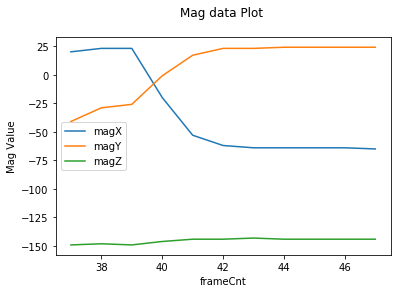

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

count = df.frameCnt
magX = df.magX
magY = df.magY
magZ = df.magZ
magT = df.magT

plt.figure()
plt.plot(count, magX, label='magX')
plt.plot(count, magY, label='magY')
plt.plot(count, magZ, label='magZ')
plt.xlabel('frameCnt')
plt.ylabel('Mag Value')
plt.title('Mag data Plot \n ')
plt.legend()
plt.show()

# df2 = pd.DataFrame(np.random.rand(10, 4), columns=['magX', 'magX', 'magX', 'magX'])
# plt.figure(); df2.plot();

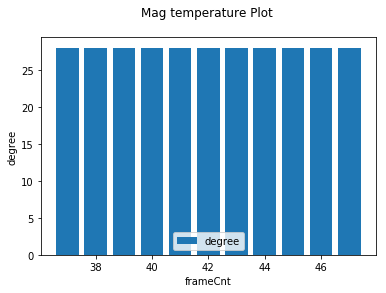

In [37]:
plt.figure()
plt.bar(count, magT, label='degree')
plt.xlabel('frameCnt')
plt.ylabel('degree')
plt.title('Mag temperature Plot \n ')
plt.legend()
plt.show()

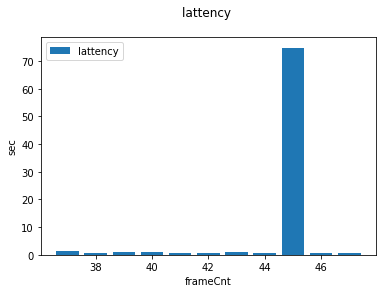

In [38]:
lattency = df.latency_time

plt.figure()
plt.bar(count, lattency, label='lattency')
plt.xlabel('frameCnt')
plt.ylabel('sec')
plt.title('lattency \n ')
plt.legend()
plt.show()